In [11]:
import numpy as np
import cv2
import os
from keras.models import load_model
import matplotlib.pyplot as plt

# Disable CUDA devices (optional)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [13]:
# Load the pre-trained model
model = load_model('full_CNN_model.h5')

In [14]:
# Path to the image
path = 'unsegmented16.png'

# Read the image using OpenCV
image = cv2.imread(path)

# Convert the image from BGR to RGB color space
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize the image to the desired input size for the model
small_img = cv2.resize(image, (160, 80))

# Add an extra dimension to match the input shape of the model
small_img = small_img[None,:,:,:]

# Make predictions using the model
pred = model.predict(small_img)[0]

1/1 [==============================] - 0s 135ms/step


In [15]:
# Resize the predicted image to the original size
lane_image = cv2.resize(pred, (480, 288))

# Convert the image to binary based on a threshold (0.5 in this case)
lane_image = np.where(lane_image > 0.5, 1, 0).astype(np.uint8)

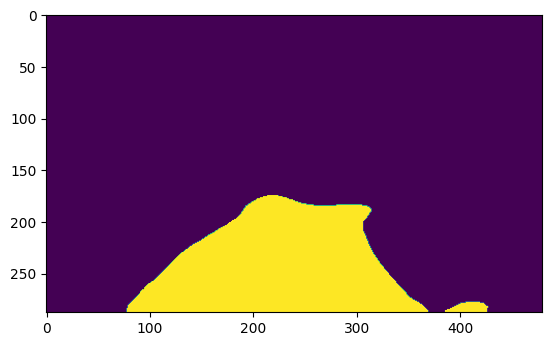

In [19]:
# Display the resulting lane image using Matplotlib
plt.imshow(lane_image)